## Ouverture du fichiers

In [9]:
#Importation des modules de Python 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#Ouverture de notre jeux de données principale
usa =  pd.read_csv('usa2.csv', sep=',', encoding='ISO-8859-1')

#Suppresion de la 1er colonne suivante dérengeante
usa = usa.drop(['Unnamed: 0'],axis=1)

#Renommage des colonnes
usa = usa.rename(columns = {'POP10':'population',
                             'WHITEp':'pop_blanche',
                             'BLACKp':'pop_noir',
                             'HISPAp':'pop_hispanique',
                             'ASIANp':'pop_asiatique',
                             'OTHERp' :'pop_autres',
                             'UNDER18p': '-18ans',
                             'F18TO24p':'18_24ans',
                             'F25TO44p':'25_44ans',
                             'F45TO64p':'45_64ans',
                             'MORE65p':'+65ans',
                             'NODIPLOMp':'non-diplomés',
                             'F9TO12THp' : 'lycée',
                             'UNDERGRADp':'bac',
                             'GRADUATEp':'université',
                             'F0TO20p':'-20d',
                             'F20TO40p':'20_40d',
                             'F40TO60p':'40_60d',
                             'F60TO80p' : '60_80d',
                             'F80TO100p' : '+80d'})

usa.head(10)

,cbssa,name,state,NameState,PartUSA,Political,Candidat,BorderSea,Anglais_Off,population,...,+65ans,non-diplomés,lycée,bac,université,-20d,20_40d,40_60d,60_80d,+80d
0,10100,Aberdeen,SD,South Dakota,North-West,Republicain,Trump,No,Yes,40602,...,16.64,4.88,37.82,31.41,25.89,18.21,22.36,20.66,24.30,14.47
1,10140,Aberdeen,WA,Washington,North-East,Republicain,Trump,Yes,No,72797,...,16.28,5.72,40.47,39.44,14.37,20.49,26.35,19.84,21.07,12.25
2,10180,Abilene,TX,Texas,South-West,Republicain,Trump,No,No,165252,...,13.67,6.87,39.66,31.93,21.55,20.64,25.17,19.09,20.50,14.60
3,10220,Ada,OK,Oklahoma,South-West,Republicain,Trump,No,No,37492,...,14.86,5.09,40.23,28.16,26.52,24.44,24.76,18.53,20.73,11.55
4,10300,Adrian,MI,Michigan,North-East,Republicain,Trump,No,No,99892,...,14.60,3.71,43.81,33.05,19.42,18.21,23.81,19.03,24.78,14.17
5,10420,Akron,OH,Ohio,North-East,Democrate,Clinton,No,No,703200,...,14.19,2.40,41.01,28.23,28.35,19.44,20.94,18.41,22.62,18.58
6,10460,Alamogordo,NM,New Mexico,South-West,Republicain,Trump,No,No,63797,...,14.97,7.64,36.30,38.59,17.47,24.72,26.37,19.51,19.12,10.28
7,10500,Albany,GA,Georgia,South-East,Democrate,Clinton,No,Yes,157308,...,11.99,6.32,46.68,30.91,16.09,29.28,24.08,16.34,18.18,12.11
8,10540,Albany,OR,Oregon,North-West,Republicain,Trump,No,No,116672,...,15.42,3.31,40.64,39.90,16.15,19.64,22.61,21.00,24.04,12.70
9,10580,Albany-Schenectady-Troy,NY,New-York,North-East,Republicain,Trump,No,No,870716,...,14.04,2.74,34.33,29.35,33.57,14.89,17.97,16.49,24.91,25.74


## Choix des variables


#### Régions du pays (groupes d'Etats)

In [11]:
#On choisit deux variables à analyser 

NE = usa[usa['PartUSA'] == 'North-East']
NO = usa[usa['PartUSA'] == 'North-West']
SO = usa[usa['PartUSA'] == 'South-West']
SE = usa[usa['PartUSA'] == 'South-East']
O = usa[usa['PartUSA'] == 'OTHER']

In [12]:
usa['PartUSA'].value_counts()

North-East    372
South-East    224
South-West    210
North-West    103
OTHER           8
Name: PartUSA, dtype: int64

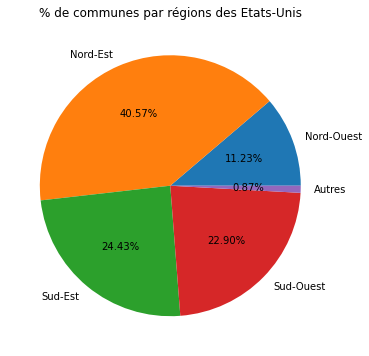

In [17]:
# Relever du nombre de commune par région


hab_reg = [103,372,224,210,8]
hab_reg


plt.figure(figsize=(10,6))

#Digramme circulaire
plt.pie(hab_reg,labels = ["Nord-Ouest","Nord-Est","Sud-Est","Sud-Ouest","Autres"], autopct = '%.2f%%')
plt.title('% de communes par régions des Etats-Unis')
plt.savefig("region_commune.png")

plt.show()

#### Population hispanique 

In [21]:
hispanique = usa[['population']]
hispanique

,population
0,40602
1,72797
2,165252
3,37492
4,99892
...,...
912,565773
913,166892
914,195751
915,86074


In [23]:
#Boite à moustache 

plt.boxplot(hispanique.population,main="Boite à moustache")

plt.show()

TypeError: boxplot() got an unexpected keyword argument 'main'

# 1 - Décomposition de la somme des carrées 


### 1-1 Construction des sommes des carrées 

#### Somme des carrées expliquées

In [6]:
sce = 372*((np.mean(NE['pop_hispanique']) - np.mean(usa['pop_hispanique']))**2) + 224*((np.mean(SE['pop_hispanique']) - np.mean(usa['pop_hispanique']))**2)+ 210*((np.mean(SO['pop_hispanique']) - np.mean(usa['pop_hispanique']))**2)+ 103*((np.mean(SO['pop_hispanique']) - np.mean(usa['pop_hispanique']))**2)+ 8*((np.mean(O['pop_hispanique']) - np.mean(usa['pop_hispanique']))**2)
      
sce

121697.98655656706

#### Somme des carrées résiduels

In [25]:
#liste des écarts
res = []

moy = np.mean(usa['pop_hispanique'])

#somme pour le Nord-Est
s = 0
ne_h = NE['pop_hispanique']
for i in range(372):
    s =+ (ne_h - moy)**2

res.append(sum(s))


#somme pour le Nord-Ouest
s = 0
no_h = NO['pop_hispanique']
for i in range(103):
    s =+ (no_h - moy)**2

res.append(sum(s))


#somme pour le SUd-Ouest
s = 0
so_h = SO['pop_hispanique']
for i in range(103):
    s =+ (so_h - moy)**2

res.append(sum(s))


#somme pour le Sud-Est
s = 0
se_h = SE['pop_hispanique']
for i in range(103):
    s =+ (se_h - moy)**2

res.append(sum(s))


#somme pour le Autres
s = 0
o_h = O['pop_hispanique']
for i in range(103):
    s =+ (o_h - moy)**2

res.append(sum(s))

res

[27599.773784759156,
 5480.433970040757,
 175901.32966202093,
 14925.750333193213,
 145.66869535122981]

In [27]:
scr = sum(res)
scr

224052.9564453653

#### Décomposition de la variance 


In [28]:
#Variance Inter-groupe
var_inter = sce/4

#Variance Intre-groupe
var_intra = scr/912


#variance total
var_total = var_inter + var_intra

In [29]:
var_inter

30424.496639141766

In [30]:
var_intra

245.67210136553211

#### Coéfficient de détermination 

In [35]:
r = var_inter/var_total

r

0.991989867957881

In [ ]:
blanche = usa.pop_blanche
candidat = usa.Candidat

mdl = statsmodels.formula.api.ols('blanche ~ candidat', data = usa)
res = mdl.fit()

In [ ]:
import statsmodels.api
    
table = statsmodels.api.stats.anova_lm(res)